In [ ]:
from pyspark import SparkContext,SparkConf

In [ ]:
# Initializing Spark

In [ ]:
conf=SparkConf().setAppName("testApp1").setMaster("local[*]")
sc=SparkContext(conf=conf)

In [ ]:
print (sc)

<SparkContext master=local[*] appName=testApp1>


In [ ]:
sc.defaultParallelism

2

In [ ]:
#Generate random data
import random
randomlist=random.sample(range(0,40),10)
print (randomlist)

[33, 28, 20, 19, 12, 24, 15, 21, 0, 29]


In [ ]:
#Create RDD
rdd1=sc.parallelize(randomlist,4)
rdd1.collect()

[33, 28, 20, 19, 12, 24, 15, 21, 0, 29]

In [ ]:
#Data distribution in partitions.
print ("No. of partitions: ",rdd1.getNumPartitions())
print ("Distribution of partitions:",rdd1.glom().collect())
print ("The two partitions:",rdd1.glom().take(2))

No. of partitions:  4
Distribution of partitions: [[33, 28], [20, 19], [12, 24], [15, 21, 0, 29]]
The two partitions: [[33, 28], [20, 19]]


In [ ]:
#Print last partition
rdd1.glom().collect()[3]


[15, 21, 0, 29]

In [ ]:
#count()
rdd1.count()

10

In [ ]:
#first()
rdd1.first()

33

In [ ]:
#top()
rdd1.top(2)

[33, 29]

In [ ]:
#distinct()
rdd1.distinct().collect()

[28, 20, 12, 24, 0, 33, 21, 29, 19, 15]

In [ ]:
def myfunc(item):
  return(item + 1) * 3

In [ ]:
#map()
rdd_map=rdd1.map(myfunc)
rdd_map.collect()

[42, 60, 72, 15, 78, 54, 105, 111, 9, 96]

In [ ]:
rdd_map.glom().collect()

[[42, 60], [72, 15], [78, 54], [105, 111, 9, 96]]

In [ ]:
rdd_map=rdd1.map(lambda item:(item + 1) * 3)

In [ ]:
rdd_map.glom().collect()

[[42, 60], [72, 15], [78, 54], [105, 111, 9, 96]]

In [ ]:
#filter()
rdd_filter=rdd1.filter(lambda x: x%3==0)
print (type(rdd_filter))
rdd_filter.collect()


<class 'pyspark.rdd.PipelinedRDD'>


[36]

In [ ]:
rdd_filter.glom().collect()

[[], [], [], [36]]

In [ ]:
#flatmap()
rdd_flatmap=rdd1.flatMap(lambda x: [x + 2, x + 5])
rdd_flatmap.collect()
rdd_flatmap.glom().collect()
rdd_flatmap.reduce(lambda x,y: x + y)

478

In [ ]:
#Descriptive Statistics
print ("Maximum value", rdd1.max())
print ("Minimum value", rdd1.min())
print ("Average value", rdd1.mean())
print ("Total value", rdd1.sum())
print ("Standard deviation value", round(rdd1.stdev(),2))

Maximum value 36
Minimum value 2
Average value 20.4
Total value 204
Standard deviation value 11.16


In [ ]:
#mapPartitions()
def myfunc(partition):
  sum=0
  for item in partition:
    sum=sum + item
  yield sum

rdd1.mapPartitions(myfunc).collect()

[35, 63, 35, 97]

In [ ]:
# Create RDD:
rdd1 = sc.parallelize([7, 30, 36, 29, 20, 18, 9, 2, 23, 38], 4)
rdd1.collect()

[7, 30, 36, 29, 20, 18, 9, 2, 23, 38]

In [ ]:
# Define a function to double each element using map()
def double(x):
    return x * 2


In [ ]:
# Apply map() transformation
map_result_rdd = rdd1.map(double)

In [ ]:
# Define a function to double each element using mapPartitions()
def double_partition(partition):
    sum = 0
    for item in partition:
      sum = sum + (item * 2)
    yield sum

In [ ]:
# Apply mapPartitions() transformation
mappartitions_result_rdd = rdd1.mapPartitions(double_partition)

In [ ]:
# Print the results
print("RDD with partitions: ", rdd1.glom().collect())
print("Map Result: ", map_result_rdd.glom().collect())
print("MapPartitions Result: ", mappartitions_result_rdd.glom().collect())


RDD with partitions:  [[7, 30], [36, 29], [20, 18], [9, 2, 23, 38]]
Map Result:  [[14, 60], [72, 58], [40, 36], [18, 4, 46, 76]]
MapPartitions Result:  [[74], [130], [76], [144]]


In [ ]:
#Union()
print (rdd1.collect())
rdd2=sc.parallelize([2,14,20,20,28,9,13,3],2)
print (rdd2.collect())

rdd_union=rdd1.union(rdd2)
print (rdd_union.collect())
# RDD1 with 4 partitions and RDD2 with 2 partitions . Total 6 partitions
print (rdd_union.getNumPartitions())

[7, 30, 36, 29, 20, 18, 9, 2, 23, 38]
[2, 14, 20, 20, 28, 9, 13, 3]
[7, 30, 36, 29, 20, 18, 9, 2, 23, 38, 2, 14, 20, 20, 28, 9, 13, 3]
6


In [ ]:
#Intersection()
rdd_intersection=rdd1.intersection(rdd2)
print (rdd1.intersection(rdd2).collect())
print(rdd1.intersection(rdd2).getNumPartitions())

rdd_intersection.glom().collect()

[20, 2, 9]
6


[[], [], [20, 2], [9], [], []]

In [ ]:
#Find empty partitions

counter=0
for item in rdd_intersection.glom().collect():
  if len(item)==0:
    counter = counter + 1
print (counter)


4


In [ ]:
#coalesce(numPartitions) -- To reduce the number of partitions
rdd_intersection.coalesce(1).glom().collect()


[[20, 2, 9]]

In [ ]:
#takesample (withReplacement,num,[seed])
rdd1.takeSample(False,5)

[9, 20, 29, 2, 7]

In [ ]:
#takeOrdered(n,[ordering])
print (rdd1.takeOrdered(5))
print (rdd1.takeOrdered(5, key=lambda x: -x))

[2, 7, 9, 18, 20]
[38, 36, 30, 29, 23]


In [ ]:
#reduce()
rdd1.reduce (lambda x,y: x *y)

732903537600

In [ ]:
#reduceByKey()
rdd_rbk=sc.parallelize([(1,4),(7,10),(5,7),(1,12),(7,12),(7,1),(9,1),(7,4)],2)
print (rdd_rbk.glom().collect())
print (rdd_rbk.reduceByKey(lambda x,y: x + y).collect())

#User friendly visualization.
import pandas as pd
Counter = pd.DataFrame({'key': rdd_rbk.keys().collect(),
                        'values': rdd_rbk.values().collect()})
Counter

[[(1, 4), (7, 10), (5, 7), (1, 12)], [(7, 12), (7, 1), (9, 1), (7, 4)]]
[(1, 16), (7, 27), (5, 7), (9, 1)]


,key,values
0,1,4
1,7,10
2,5,7
3,1,12
4,7,12
5,7,1
6,9,1
7,7,4


In [ ]:
#sortByKey()
rdd_rbk.reduceByKey(lambda x,y: x + y).sortByKey(True).collect()

[(1, 16), (5, 7), (7, 27), (9, 1)]

In [ ]:
#countByKey()
rdd_rbk.countByKey()

# Can also use sorted() Python method.
sorted(rdd_rbk.countByKey().items())

[(1, 2), (5, 1), (7, 4), (9, 1)]

In [ ]:
#groupByKey()

rdd_group=rdd_rbk.groupByKey()
rdd_group.getNumPartitions()

rdd_group.collect()

for item in rdd_group.collect():
  print (item[0],[values for values in item[1]])

1 [4, 12]
7 [10, 12, 1, 4]
5 [7]
9 [1]


In [ ]:
#lookupByKey()
rdd_rbk.lookup(7)

[10, 12, 1, 4]

In [ ]:
#cache
rdd_rbk.persist()

ParallelCollectionRDD[27] at readRDDFromFile at PythonRDD.scala:289

In [ ]:
#Persistence (https://spark.apache.org/docs/latest/rdd-programming-guide.html#rdd-persistence)
from pyspark import StorageLevel
rdd1.persist(StorageLevel.MEMORY_AND_DISK)

ParallelCollectionRDD[0] at readRDDFromFile at PythonRDD.scala:289

In [ ]:
# PySpark with DF or DataFrames or Relational Databases

In [ ]:
!pip install pyspark

In [ ]:
import pyspark
from pyspark.sql import SparkSession

spark=SparkSession.builder.getOrCreate()
spark

In [ ]:
# CREATE DF AND BASIC OPERATIONS.
df1=spark.read.format("csv").load("/content/sample_data/CompleteDataset.csv", inferSchema=True, header=True)

In [ ]:
#Show Data:
df1.show()

+---+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|_c0|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|

In [ ]:
# How many partitions in DF.
df1.rdd.getNumPartitions()

2

In [ ]:
# Repartition -  Increase/ Decrease the partitions in Df
df2=df1.repartition(4)
df2.rdd.getNumPartitions()

#df2.show()


4

In [ ]:
#Rename columns and amend NULLs
df2=df2.withColumnRenamed("_c0","ID")\
    .withColumnRenamed("Ball control","Ball_Control")\
    .withColumnRenamed("Sliding tackle", "Sliding_Tackle")

df2.na.fill({"RAM":10,"RB":1}).show()

#df2.dropna()

+-----+-------------+---+--------------------+-------------+--------------------+-------+---------+--------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|   ID|         Name|Age|               Photo|  Nationality|                Flag|Overall|Potential|                Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball_Control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handlin

In [ ]:
#Transformation (SELECT)
df2.select("Name","Overall").distinct().show()

+------------------+-------+
|              Name|Overall|
+------------------+-------+
|        E. Horvath|     71|
|        M. Randall|     62|
|      A. Granqvist|     80|
|       A. Thompson|     65|
|    R. Cornthwaite|     66|
|         G. Zajkov|     62|
|       J. Cuadrado|     82|
|           M. Dube|     63|
|      A. Al Asmari|     62|
|           T. Aoki|     64|
|        M. Edwards|     58|
|           L. Amos|     60|
|       S. Kawamata|     56|
|A. Taylor-Sinclair|     60|
|       A. Bouchard|     60|
|        J. Cortizo|     58|
|     Fran Villalba|     70|
|         V. Lazaro|     71|
|         Guillermo|     70|
|         T. Ayasse|     68|
+------------------+-------+
only showing top 20 rows



In [ ]:
# Transformation(FILTER)
df2.filter(df2["Overall"] > 70).show()

+----+------------+---+--------------------+-------------------+--------------------+-------+---------+--------------------+--------------------+-----+----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|  ID|        Name|Age|               Photo|        Nationality|                Flag|Overall|Potential|                Club|           Club Logo|Value|Wage|Special|Acceleration|Aggression|Agility|Balance|Ball_Control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK han

In [ ]:
# Transformation(FILTER)
#df2.select("Overall","Name","Age").filter(df2["Overall"] > 70).show()
df2.select("Overall","Name","Age").where(df2["Overall"] > 70).show()


+-------+------------------+---+
|Overall|              Name|Age|
+-------+------------------+---+
|     81|      R. Guerreiro| 23|
|     72|         A. Benali| 25|
|     87|          A. Vidal| 30|
|     71|     Marlion Rolim| 25|
|     71|         I. Hayden| 22|
|     71|      P. Rodríguez| 27|
|     73|        T. Carroll| 25|
|     76|        G. Mercado| 30|
|     83|         K. Walker| 27|
|     71|            Martos| 33|
|     71|    Martin Cordeia| 33|
|     73|              Tito| 31|
|     71|K. Vandendriessche| 27|
|     78|           Muniain| 24|
|     75|    Allan Bardinho| 25|
|     72|   A. Martín Arias| 24|
|     71|       M. Albornoz| 26|
|     71|       V. Fayzulin| 31|
|     74|          C. Obasi| 31|
|     74|      G. Karadeniz| 37|
+-------+------------------+---+
only showing top 20 rows



In [ ]:
# Transformation(FILTER)

df2.where(df2["Overall"] > 70).groupBy("Age").count().sort("Age").show()



+---+-----+
|Age|count|
+---+-----+
| 17|    1|
| 18|   13|
| 19|   41|
| 20|  105|
| 21|  160|
| 22|  246|
| 23|  296|
| 24|  369|
| 25|  486|
| 26|  418|
| 27|  444|
| 28|  395|
| 29|  474|
| 30|  359|
| 31|  272|
| 32|  206|
| 33|  283|
| 34|  101|
| 35|   74|
| 36|   57|
+---+-----+
only showing top 20 rows



<Axes: xlabel='Age'>

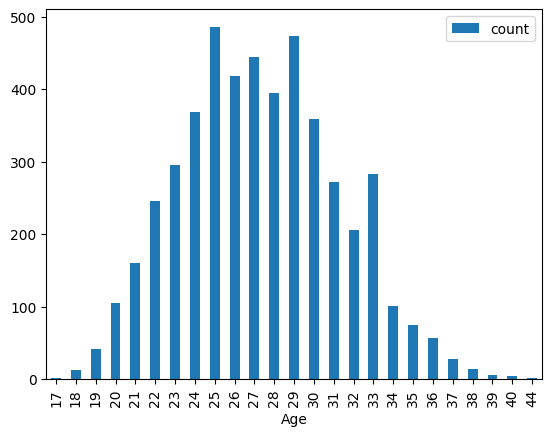

In [ ]:
#Visualize the results
df2_result=df2.where(df2["Overall"] > 70).groupBy("Age").count().sort("Age")
pandas_df=df2_result.toPandas()
pandas_df.plot(x="Age",y="count", kind="bar")

<Axes: xlabel='Age'>

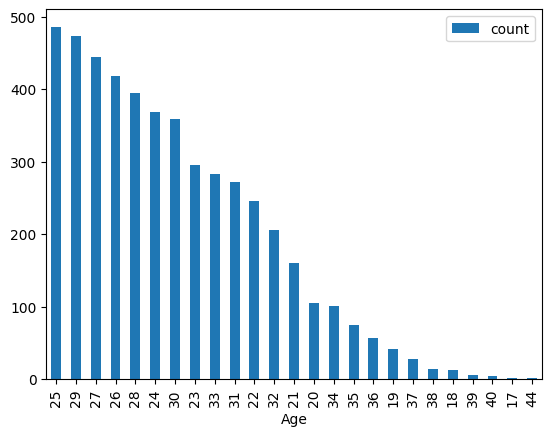

In [ ]:
pandas_df.sort_values(by="count", ascending=False).plot(x="Age",y="count", kind="bar")

In [ ]:
#ADVANCED DF OPERATIONS - SPARK SQL AND UDF
#Spark SQL (Register Df with a local temporary View)

In [ ]:
df2.createOrReplaceTempView("df_football")

In [ ]:
#SQL query
sql_query="""SELECT Age, count(*) as Count
                    FROM df_football
                    WHERE Overall > 70
                    GROUP BY Age
                    ORDER BY Age"""
result=spark.sql(sql_query)
result.show()

+---+-----+
|Age|Count|
+---+-----+
| 17|    1|
| 18|   13|
| 19|   41|
| 20|  105|
| 21|  160|
| 22|  246|
| 23|  296|
| 24|  369|
| 25|  486|
| 26|  418|
| 27|  444|
| 28|  395|
| 29|  474|
| 30|  359|
| 31|  272|
| 32|  206|
| 33|  283|
| 34|  101|
| 35|   74|
| 36|   57|
+---+-----+
only showing top 20 rows



In [ ]:
#UDF - User Defined Functions
def uppercase_converter(record):
  if len(record) > 10:
    return record.upper()
  else:
    return record.lower()

# register the DF
df2.createOrReplaceTempView("UDF_football")

# register the function
spark.udf.register("UPPER", uppercase_converter)

# Use the UDF in SQL
sql_query= "SELECT Age, UPPER(Name) as Name, UPPER(club) as Club FROM UDF_football"

result= spark.sql(sql_query)
result.show()

+---+-----------------+--------------------+
|Age|             Name|                Club|
+---+-----------------+--------------------+
| 26|         v. moren|    WAASLAND-BEVEREN|
| 33|        c. agoste|UNIVERSIDAD CATÓLICA|
| 19|    STEVEN PRIETO|         REAL OVIEDO|
| 21|        c. alemán|ESTUDIANTES DE LA...|
| 27|       p. wiegers|   SG DYNAMO DRESDEN|
| 26|     H. YAMAGUCHI|        CEREZO OSAKA|
| 29|    D. MCGOLDRICK|        IPSWICH TOWN|
| 24|       r. teibert|VANCOUVER WHITECA...|
| 20|          i. radu|            avellino|
| 28|   P. ABRAHAMSSON|           bk häcken|
| 21|       c. burgess|   SCUNTHORPE UNITED|
| 31|            galán|      RAYO VALLECANO|
| 25|       r. andrero|      AUDAX ITALIANO|
| 31|         m. topal|       FENERBAHÇE SK|
| 23|        l. moneta|      LEGIA WARSZAWA|
| 21|        t. szántó|       SK RAPID WIEN|
| 23|          y. njie|         BOAVISTA FC|
| 20|     AARÓN MARTÍN|        RCD ESPANYOL|
| 23|K. FRIESENBICHLER|     FK AUSTRIA WIEN|
| 20|     